In [1]:
import landsat_analysis as la
la.create_archive_from_tgz(la.landsat_raw_data, la.landsat_file_root)
ndvi_df = la.generate_ndvi()
avalanche_overlap_shape = la.generate_avalanche_shapes(ndvi_df.crs)

Number of files found: 133
Number of files already present: 134
Number of files to upload: 0
Analyzing year 2008
Analyzing year 2009
Analyzing year 2010
Analyzing year 2011
Analyzing year 2012
Analyzing year 2013
Analyzing year 2014
Analyzing year 2015
Analyzing year 2016
Analyzing year 2017
Analyzing year 2018


# Annual NDVI Analysis

## Purpose
* Determine the correlation between mean NDVI values and avalanche paths.
* Determine whether there is a relationship between change in mean summertime NDVI (analyzing NDVI within predetermined avalanche paths and outside of predetermined avalanche paths separately) and snowfall during the prior winter.
    
## Data Access 
* Landsat data can be downloaded from the [Earth Explorer](http://earthexplorer.usgs.gov).  In this study, only summertime data (July-September) was used from Landsat 7 and Landsat 8.
* To extract these gzipped files, run the `create_archive_from_tgz()` function.  This will unzip and crop the data to the study area.
   
## Methods
* Generate elevation shapes representing every 100 meters in elevation.
* Find the union of these elevation shapes and the avalanche shapes.
* Collect and crop Landsat 7 or 8 scenes from summer-representative months (in this case, July-September).
* For each scene:
    - Determine the NDVI for each scene.
    - Mask scene by invalid values, clouds, water and snow.
* Calculate the maximum NDVI for each pixel over all scenes (minimizes the effect of low bias when you have snow in the scene).
* Using rasterstats, determine the mean NDVI in each elevation bucket that is within an avalanche shape and that is outside an avalanche shape.
* Plot NDVI data:
    - Plot NDVI data in a Choropleth map, with the color of each elevation bucket within each avalanche path representing the NDVI within that path to demonstrate the relationship between NDVI and elevation (see _Landsat fig 1_).
    - Plot NDVI data in a 2-series bar plot to connect both the elevation-NDVI relationship as well as to highlight any variations there may be in mean in-avalanche-path NDVI compared to out-of-avalanche-path NDVI in each elevation bucket (see _Landsat fig 3_).
    - Plot NDVI data in a Choropleth map, with the color of each elevation bucket within each avalanche path representing mean NDVI outside of avalanche paths subtracted from each avalanche path's NDVI at each elevation bucket (see _Landsat fig 2_).
* Determine the difference between the maximum NDVI pixels and the minimum NDVI pixels throughout the study period.
* Determine the annual dNDVI below a height threshold.
* Plot dNDVI data:
    * Plot the absolute difference in NDVI over the study period (see _Landsat fig 4_).
    * Plot a 3-series, dual-axis bar-and-line plot (in-avalanche and out-of-avalanche) representing the annual dNDVI and the total snowfall the winter prior (see _Landsat fig 5_)
        
## Sources of Uncertainty and Noise
* Lingering snowpack on the ground
* Uneven greenness 
* Unfiltered cloud cover
* Natural features where NDVI varied spatially (eg landslides)

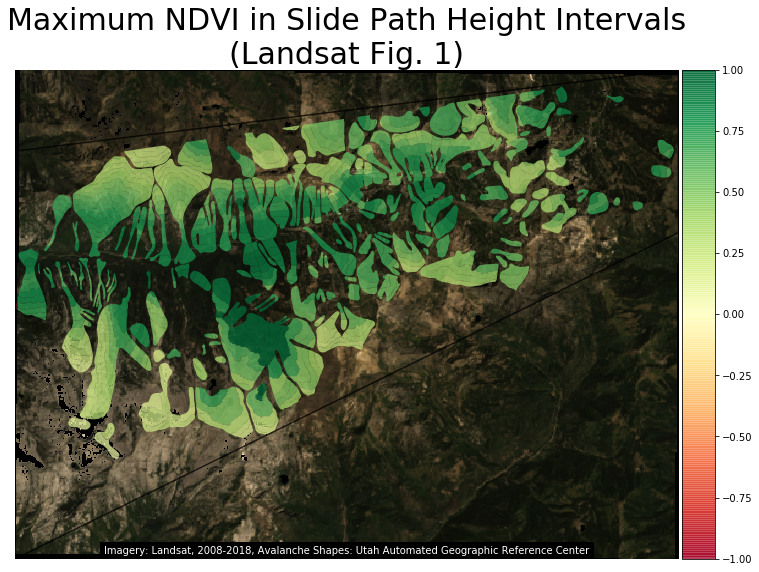

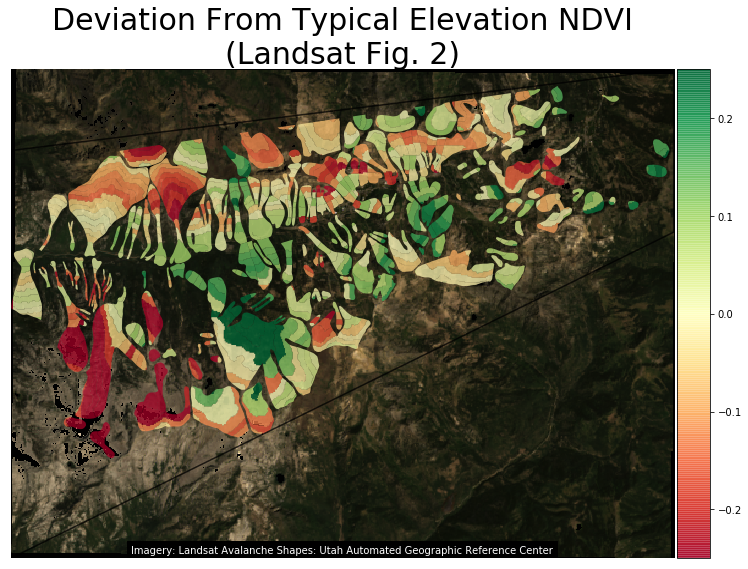

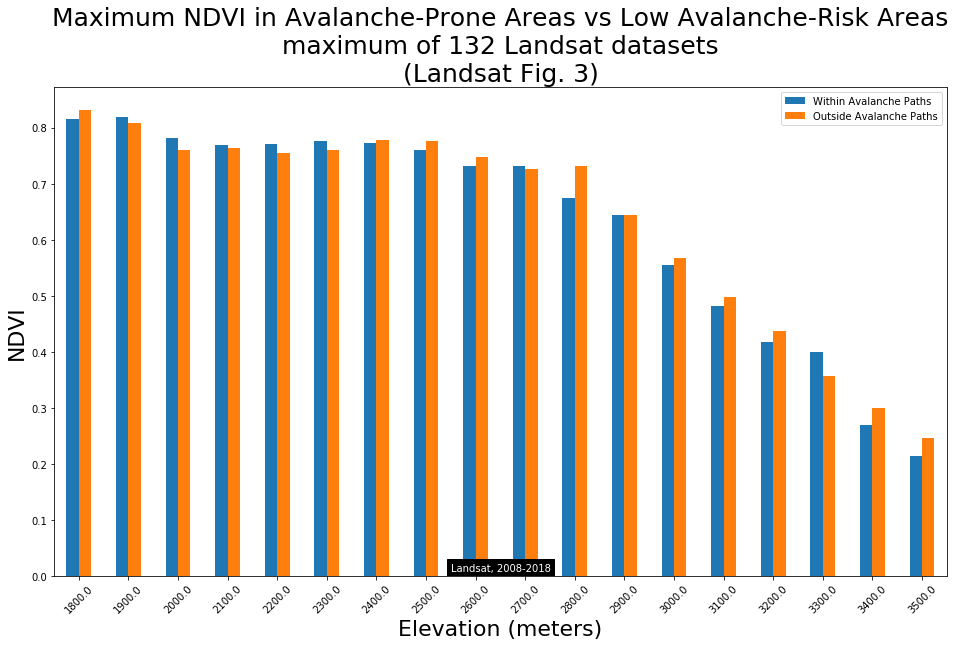

In [2]:
la.ndvi_analysis(ndvi_df, avalanche_overlap_shape)

## Landsat Fig. 1
This choropleth map shows the strong relationship between elevation and NDVI.  It indicates that a elevation-normalized analysis is necessary when determining NDVI signals in avalanche paths.

## Landsat Fig. 2
This choropleth map shows the relative difference in NDVI in each shape (shape mean NDVI - mean NDVI for that elevation bucket outside of avalanche shapes).  It shows a consistent depression in NDVI above tree line but mixed signals below tree line.

## Landsat Fig. 3
This plot shows the NDVI in avalanche paths vs NDVI outside of avalanche paths for distinct elevation buckets.  Similar to Landsat Fig. 2, it shows a consistently lower NDVI in avalanche paths compared to outside avalanche paths above treeline, but no strong signal below treeline.

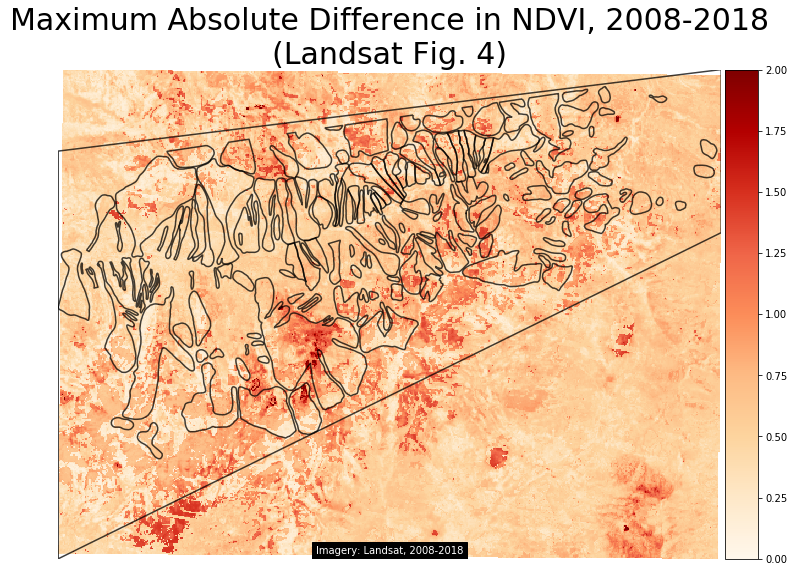

In [3]:
la.calculate_maximum_diff(ndvi_df)

## Landsat Fig. 4
This plot shows the maximum difference in NDVI over the study period.  Our hypothesis would support larger deviations in NDVI below treeline and at the base of the avalanche paths, however this plot does not show any correlation between dNDVI and avalanche paths.

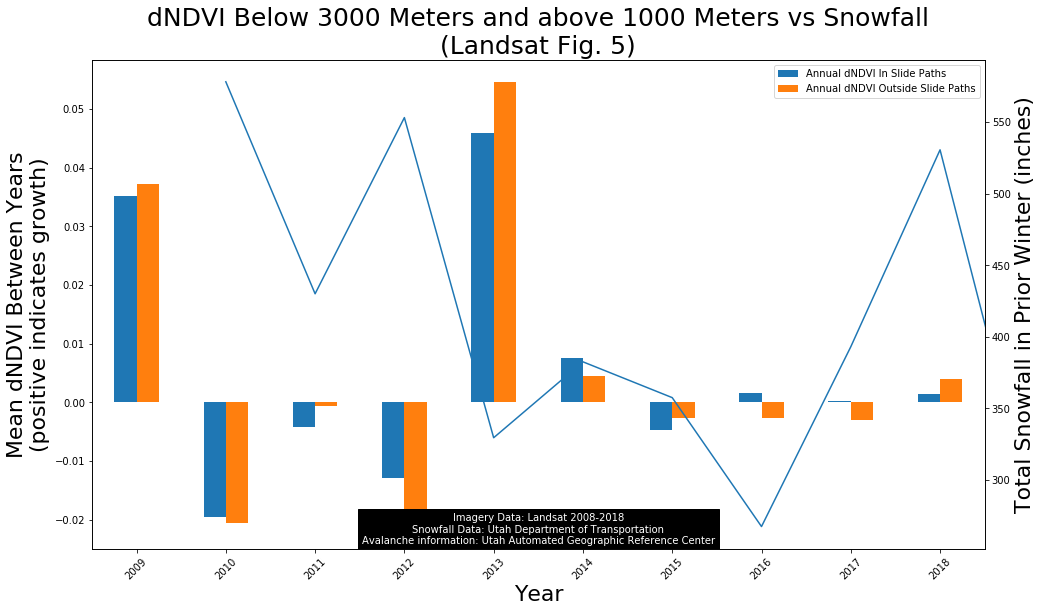

In [4]:
dndvi_df = la.generate_dndvi(ndvi_df, avalanche_overlap_shape)
_ = la.dndvi_analysis(dndvi_df)

## Landsat Fig. 5
This plot shows the relationship between NDVI (separating out "inside-avalanche-path" and "outside-avalanche-path") and snowfall the winter prior, specifically analyzing areas below treeline.  The hypothesis would show a correlation between snowfall and negative dNDVI, however there is seemingly very little correlation between these factors.  Of particular importance is the scale of the left y-axis; the deviations from year to year are very small and other drivers likely have a greater effect on this value.

## Results and Conclusions
Our hypothesis for this study was that we would find a correlation between avalanche paths and NDVI/dNDVI due to vegetation damage from the physical trauma of the avalanches.  After analyzing the NAIP and Landsat NDVI/dNDVI data, we found very little correlation between vegetation health and predetermined avalanche paths.  

Our study of the high-resolution NAIP data indicated that NDVI was highly dependent on elevation, as is evident in the elevation buckets vs mean NAIP NDVI graph above.  There are several factors potentially contributing to this, with the two most prominent being a decrease in vegetation and increase in rocks in ground cover as well as lingering alpine snow decreasing the NDVI.  Upon analysis of NDVI within avalanche paths and NDVI outside of avalanche paths, it was found that the NAIP data did not support our hypothesis.  The mean NDVI within each avalanche path and within all other non-avalanche-path terrain at that elevation was very similar.

After finding very little correlation between slide paths and NDVI in general, we examined a slide path that seemed obvious in the sattelite image (using RGB bands).  In this slide path, the equivalent NDVI image showed very little indicator of the vegetation change.

Similar to the NAIP data, the Landsat NDVI data was highly dependent on elevation.  For this reason, an elevation-bucketed analysis was required.  After bucketing elevations, it was found that NDVI had consistent lower values in avalanche tracks above 2000 meters.  However, this was likely not caused by the hypothesized driver - damage to vegetation from the physical trauma of avalanches.  This terrain was almost entirely above treeline, so trauma to vegetation from avalanches would be unlikely when the vegetation is short enough to be buried in snow throughout the winter.  These avalanche paths are more likely to occur on steeper slopes, averaging 45 degrees.  These steep slopes will also suppress the growth of vegetation, decreasing the NDVI in these areas.

Below 2000 meters, mixed results were found in the deviation between NDVI in-avalanche-path and NDVI out-of-avalanche-path.  Similar to the NAIP data, some paths contained a strong signal for decreased NDVI, but physically examining those paths showed other natural factors (not damage to vegetation) that caused this suppression.  We concluded that there was no strong signal correlating damage in vegetation as measured by NDVI with avalanches.

The advantages Landsat data had over NAIP was the ability to do a thorough time analysis of NDVI.  To simplify the time analysis, all NDVI below treeline was analyzed in two categories; in-slide-path and out-of-slide-path. The annual dNDVI was then determined by subtracting the prior year from the current year for each year over the study period.  These two categories in difference in annual NDVI were then plotted against total snowfall the year prior.  The hypothesis of a correlation between snowfall and suppressed dNDVI proved inconclusive after analyzing the data, as prior snowfall and dNDVI do not seem correlated. 

In addition, we analyzed 2-meter resolution Digital Elevation Model data.  From this data, we were able to generate a slope and aspect raster that could then be used to determine an avalanche danger rating.  This helped us determine which avalanche paths were higher-risk and which were lower-risk to allow us to compare different avalanche sizes with vegetation damage, as indicated by NDVI.  In addition, we analyzed recorded avalanche activity to help us understand where avalanches were more likely to occur.  Ultimately, these data were helpful as background information but not used directly in the NDVI or dNDVI study, as no general correlation was found between avalanche paths and NDVI/dNDVI.

While our results did not directly support this hypothesis, they gave us an intersting insight into the complexity of NDVI in mountainous regions, which was highly correlated to elevation and other factors.  While the support of our hypothesis proved to be inconclusive, additional normalization for other factors as well as more thorough and manual data cleaning and slide path designation may reveal a previously-hidden signal between NDVI/dNDVI and avalanche paths.  

## Future studies
### Replace the avalanche paths with a physical model to define the paths with higher resolution.
One potential source of error is the assumed "ground truth" of the avalanche paths.  By generating new avalanche paths based on a physical model and observations, one could potentially make an avalanche path that is much more consistent with reality.

### Study the vegetation change within a buffer around an avalanche path boundary instead of a general mean in-path/out-of-path NDVI value
Our study focused on the difference in in-avalanche-path vegetation health vs out-of-avalanche-path vegetation health.  Another potential indicator would be the gradient of vegetation health and/or vegetation types around the edge of avalanche path.

### Perform a case study on an area that has had avalanche damage.
While avalanches can often generate a large amount of damage, we were not able to visually find any fresh damage in our study area during our study period.  Examining such damage could help us generate a better predictor for these types of events.

### Analyze green-up over a summer and only use one landsat scene per year, which represents maximum greenness for analysis.
While there was a lot of landsat data, aggregating different frames which were partially obscured by clouds made for messy and potentially inaccurate assumptions.  Using a single, cloud-free frame and normalizing this frame to the "maximum greenness" would eliminate some of these challenges associated with aggregating a summers' worth of Landsat data.

### Investigate the relationship between slope angle and NDVI above treeline.
Our Landsat study indicated a depression in NDVI inside avalanche paths above treeline.  This is likely not caused by physical trauma of avalanches and instead the relationship between avalanche paths, slope angle and NDVI.  Generate a slope angle vs NDVI and avalanche path vs slope angle plot to confirm this relationship and tune up/down the analyzed NDVI based on the slope angle.

### Perform study in a different location with avalanche paths that run further below treeline.
This study area was chosen for its thorough avalanche track data.  However, it may be more benefitial (albeit more time consuming) to perform this study in a different location with more paths that run further below treeline.  More damage, and a greater NDVI depression, within avalanche tracks would then be more likely.

### Use an indicator other than NDVI
As indicated above, it is fairly easy to recognize an avalanche path using RGB data.  Use another band, or combination of bands, instead of NDVI to help determine where avalanche paths may be.